In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Which parts of the year are investments/acquisitions more active? 
# Is there a part of the year where the overall number of investments are larger?



In [4]:
investments = pd.read_csv('investments.csv')

In [5]:
investments.dtypes

company_permalink           object
company_name                object
company_category_list       object
company_country_code        object
company_state_code          object
company_region              object
company_city                object
investor_permalink          object
investor_name               object
investor_country_code       object
investor_state_code         object
investor_region             object
investor_city               object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [6]:
# Convert the funded_at column into a DateTime type for easier analysis
# Refer to the pandas TimeSeries and .dt properties on the pandas API Reference
investments['funded_at'] = pd.to_datetime(investments.funded_at)

In [7]:
investments.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
investor_permalink                 object
investor_name                      object
investor_country_code              object
investor_state_code                object
investor_region                    object
investor_city                      object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

In [8]:
# Add a new column that specifies which quarter of the year the investment
# was made in. Could be useful for plotting?
investments['quarter'] = investments.funded_at.dt.quarter

In [9]:
# Add a new column that specifies the name of the month that the investment was made
investments['month'] = investments.funded_at.dt.month_name()

In [10]:
investments.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,quarter,month
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,1,March
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,3,July
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0,3,July
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,4,November
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,2,May


In [11]:
# how many investments occur per quarter? 
quarterly_investments_total = investments.groupby('quarter')['company_permalink'].count()

In [12]:
quarterly_investments_total
# Seems to not be that interesting

quarter
1    43879
2    42222
3    42610
4    39936
Name: company_permalink, dtype: int64

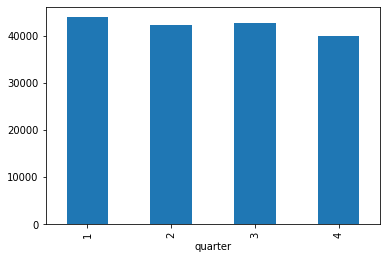

In [13]:
# not really interesting
quarterly_investments_total.plot.bar()

In [14]:
# Now doing the same for monthly investments

In [15]:
monthly_investments_total = investments.groupby('month')['company_name'].count()

In [16]:
monthly_investments_total

month
April        13524
August       13422
December     11813
February     11922
January      18127
July         14243
June         15286
March        13829
May          13412
November     13490
October      14633
September    14945
Name: company_name, dtype: int64

In [17]:
monthly_investments_mean = investments.groupby('month')['raised_amount_usd'].mean()

In [18]:
monthly_investments_mean

month
April        1.531510e+07
August       1.445331e+07
December     1.591222e+07
February     1.243931e+07
January      1.345839e+07
July         1.673260e+07
June         1.702243e+07
March        1.463940e+07
May          1.544024e+07
November     1.513594e+07
October      1.518968e+07
September    1.604446e+07
Name: raised_amount_usd, dtype: float64

In [19]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [20]:
monthly_investments_total.reindex(index=months_in_order)

month
January      18127
February     11922
March        13829
April        13524
May          13412
June         15286
July         14243
August       13422
September    14945
October      14633
November     13490
December     11813
Name: company_name, dtype: int64

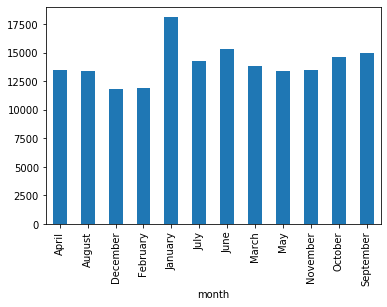

In [21]:
fig = plt.figure()
monthly_investments_total.plot(kind='bar')
# need to figure out how to get the x-axis labels to be displayed in the same order as the Series index

In [22]:
# Result: January sees the most activity in terms of total number of investments

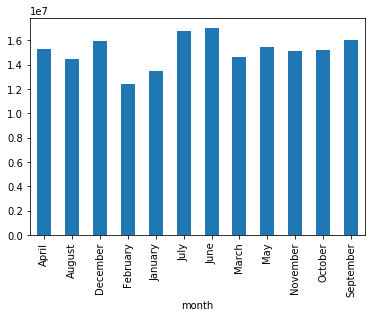

In [23]:
fig_two = plt.figure()
monthly_investments_mean.plot(kind='bar')

In [24]:
# now do similar stuff for the aacquisitions.csv file...

In [25]:
acquisitions = pd.read_csv('acquisitions.csv')

In [26]:
acquisitions.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2001-02-02,2001-02,NaN,USD


In [27]:
acquisitions.dtypes

company_permalink          object
company_name               object
company_category_list      object
company_country_code       object
company_state_code         object
company_region             object
company_city               object
acquirer_permalink         object
acquirer_name              object
acquirer_category_list     object
acquirer_country_code      object
acquirer_state_code        object
acquirer_region            object
acquirer_city              object
acquired_at                object
acquired_month             object
price_amount              float64
price_currency_code        object
dtype: object

In [28]:
# drop the acquisitions that are missing a date
acquisitions[acquisitions['acquired_at'].isnull()]
acquisitions = acquisitions.dropna(subset=['acquired_at'])


In [ ]:
# This company's acquired_at date is incorrect and cannot be converted into a TimeSeries, so I'm dropping it from the table
# bad_dates = ['1201-11-03', '3201-10-21']
# #acquisitions.loc[acquisitions['acquired_at'] == '3201-10-21']
# acquisitions.loc[acquisitions['acquired_at'] == '1201-11-03']


In [ ]:
# acquisitions.drop(index=2635, inplace=True)

In [29]:
# Convert dates into Panda TimeSeries type for more reliable manipulation
# Dates with an incorrect format will be replaced with NaT
bad_dates = []

acquisitions['acquired_at'] = pd.to_datetime(acquisitions.acquired_at, errors='coerce')

In [ ]:
# Now drop all datetimes that are NaT (basically NaN)

In [32]:
acquisitions.dropna(subset=['acquired_at'], inplace=True)

In [34]:
# Create a new column representing the month in which the acquisition was made

In [35]:
acquisitions['month'] = acquisitions.acquired_at.dt.month_name()

In [37]:
# Group 
monthly_acquisitions_total = acquisitions.groupby('month')['company_name'].count()

In [38]:
monthly_acquisitions_total

month
April        1439
August       1422
December     1491
February     1349
January      1890
July         1660
June         1618
March        1403
May          1515
November     1607
October      1855
September    1705
Name: company_name, dtype: int64

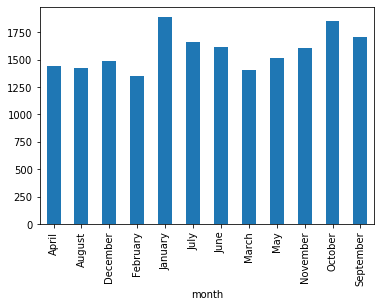

In [39]:
monthly_acquisitions_total.plot(kind='bar')